# MISIT 손글씨 - CNN1

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [3]:
X_train = X_train /255.0
X_test = X_test / 255.0

In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1,28,28,1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [7]:
model1 = Sequential([
    Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),                                                  # N차원은 1차원으로 변경 시켜준다.
    Dense(512, activation='relu'),
    Dense(10, activation= 'softmax')
])

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               18874880  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 18,898,826
Trainable params: 18,898,826
Non-trainable params: 0
_________________________________________________________________


In [8]:
model1.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

In [9]:
modelpath = 'model/best_mnist_dnn.h5'
checkpoint = ModelCheckpoint(modelpath, verbose=1, save_best_only=True)
early_stopping = EarlyStopping(patience=10)

In [10]:
history = model1.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=50, batch_size=200, verbose=0,
    callbacks=[checkpoint, early_stopping]
)


Epoch 00001: val_loss improved from inf to 0.01299, saving model to model\best_mnist_dnn.h5

Epoch 00002: val_loss improved from 0.01299 to 0.00986, saving model to model\best_mnist_dnn.h5

Epoch 00003: val_loss improved from 0.00986 to 0.00971, saving model to model\best_mnist_dnn.h5

Epoch 00004: val_loss improved from 0.00971 to 0.00846, saving model to model\best_mnist_dnn.h5

Epoch 00005: val_loss did not improve from 0.00846

Epoch 00006: val_loss did not improve from 0.00846

Epoch 00007: val_loss did not improve from 0.00846

Epoch 00008: val_loss did not improve from 0.00846

Epoch 00009: val_loss did not improve from 0.00846

Epoch 00010: val_loss did not improve from 0.00846

Epoch 00011: val_loss did not improve from 0.00846

Epoch 00012: val_loss did not improve from 0.00846

Epoch 00013: val_loss did not improve from 0.00846

Epoch 00014: val_loss did not improve from 0.00846


In [11]:
from tensorflow.keras.models import load_model
best_model = load_model(modelpath)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.0081 - accuracy: 0.9882


[0.00813060998916626, 0.9882000088691711]

### 훈련과정 시각화

In [13]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

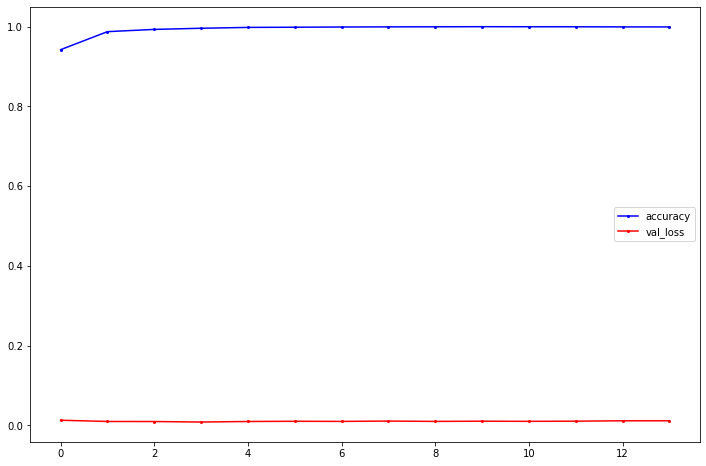

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()